In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
# Getting path from remote server (Digitalocean Droplet)
import os
os.getcwd()

'/home/jonas'

In [64]:
df = pd.read_csv('Pycharmprojects/HelloFoodFreak/meal_delivery/train_GzS76OK/train.csv')
# warehouses = pd.read_csv('Pycharmprojects/HelloFoodFreak/meal_delivery/train_GzS76OK/fulfilment_center_info.csv')
# df = train.merge(warehouses, on='center_id')
df.set_index('id', inplace=True)

In [65]:
df.head().T

id,1379560,1466964,1346989,1338232,1448490
week,1.00,1.00,1.00,1.00,1.0
center_id,55.00,55.00,55.00,55.00,55.0
meal_id,1885.00,1993.00,2539.00,2139.00,2631.0
checkout_price,136.83,136.83,134.86,339.50,243.5
base_price,152.29,135.83,135.86,437.53,242.5
emailer_for_promotion,0.00,0.00,0.00,0.00,0.0
homepage_featured,0.00,0.00,0.00,0.00,0.0
num_orders,177.00,270.00,189.00,54.00,40.0


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week,456548.0,74.768771,41.524956,1.00,39.00,76.00,111.00,145.00
center_id,456548.0,82.105796,45.975046,10.00,43.00,76.00,110.00,186.00
meal_id,456548.0,2024.337458,547.420920,1062.00,1558.00,1993.00,2539.00,2956.00
checkout_price,456548.0,332.238933,152.939723,2.97,228.95,296.82,445.23,866.27
base_price,456548.0,354.156627,160.715914,55.35,243.50,310.46,458.87,866.27
emailer_for_promotion,456548.0,0.081152,0.273069,0.00,0.00,0.00,0.00,1.00
homepage_featured,456548.0,0.109200,0.311890,0.00,0.00,0.00,0.00,1.00
num_orders,456548.0,261.872760,395.922798,13.00,54.00,136.00,324.00,24299.00


# Yay, no Null-values
sns.heatmap(df.isnull())

# Outliers seem quite ok, except for num_orders, which seems to have many. Needs further exploration
for column in df.columns.drop(['homepage_featured', 'emailer_for_promotion', 'center_id']):
    plt.figure()
    df.boxplot(column = column)

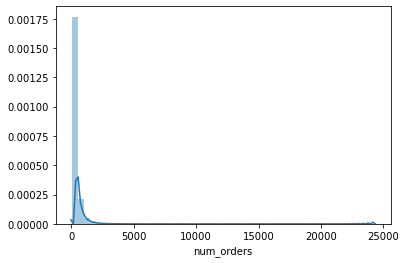

In [67]:
sns.distplot(df['num_orders'])

In [68]:
df.dtypes

week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [69]:
nominal_cols = ['center_id', 'meal_id', 'emailer_for_promotion','homepage_featured'] 
# + ['city_code', 'region_code','center_type']


df = pd.get_dummies(data= df, columns=nominal_cols)

In [70]:
X = df.drop('num_orders',axis=1)
y = df['num_orders']


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
dummy_median = DummyRegressor(strategy='mean')
dummy_regressor = dummy_median.fit(X_train,y_train)
dummy_predicts = dummy_regressor.predict(X_test)
print("Model Accuracy:", dummy_regressor.score(X_test,y_test)*100)
print('$',mean_absolute_error(y_test,dummy_predicts))

Model Accuracy: -0.0002519134642886556
$ 227.3389445174219


In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = [
          DecisionTreeRegressor(criterion='mse',max_depth=11),
          GradientBoostingRegressor(n_estimators=200,max_depth=12, verbose=0),
            RandomForestRegressor(min_samples_leaf =1, n_estimators=100,criterion='mse',max_depth=20,verbose=0)]
learning_mods = pd.DataFrame()
temp = {}

In [ ]:
#run through models
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(X_train, y_train)
    temp['R2_Price'] = r2_score(y_test, model.predict(X_test))
    print('score on training',model.score(X_train, y_train))
    print('r2 score',r2_score(y_test, model.predict(X_test)),'\n')
    learning_mods = learning_mods.append([temp])
learning_mods.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(30, 12))
learning_mods.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

DecisionTreeRegressor(max_depth=11)
score on training 0.6870313069811698
r2 score 0.6166257594230391 

GradientBoostingRegressor(max_depth=12, n_estimators=200)


In [ ]:
regressionTree_imp = model.feature_importances_


In [ ]:
features = df.columns.drop('num_orders')
data_tuples = list(zip(features,regressionTree_imp.tolist()))
features_importance = pd.DataFrame(data_tuples, columns=['Feature','Value'])


In [ ]:
print(len(features_importance))
unimportant_features = features_importance[features_importance['Value'] < .01]
features_importance = features_importance[features_importance['Value'] > .01]
print(len(features_importance))